# Predict Air Quality by Tree Model
## Load Data & Show Data

In [21]:
import pandas as pd

df = pd.read_csv('updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


## EDA(Exploratory Data Analysis)

In [22]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


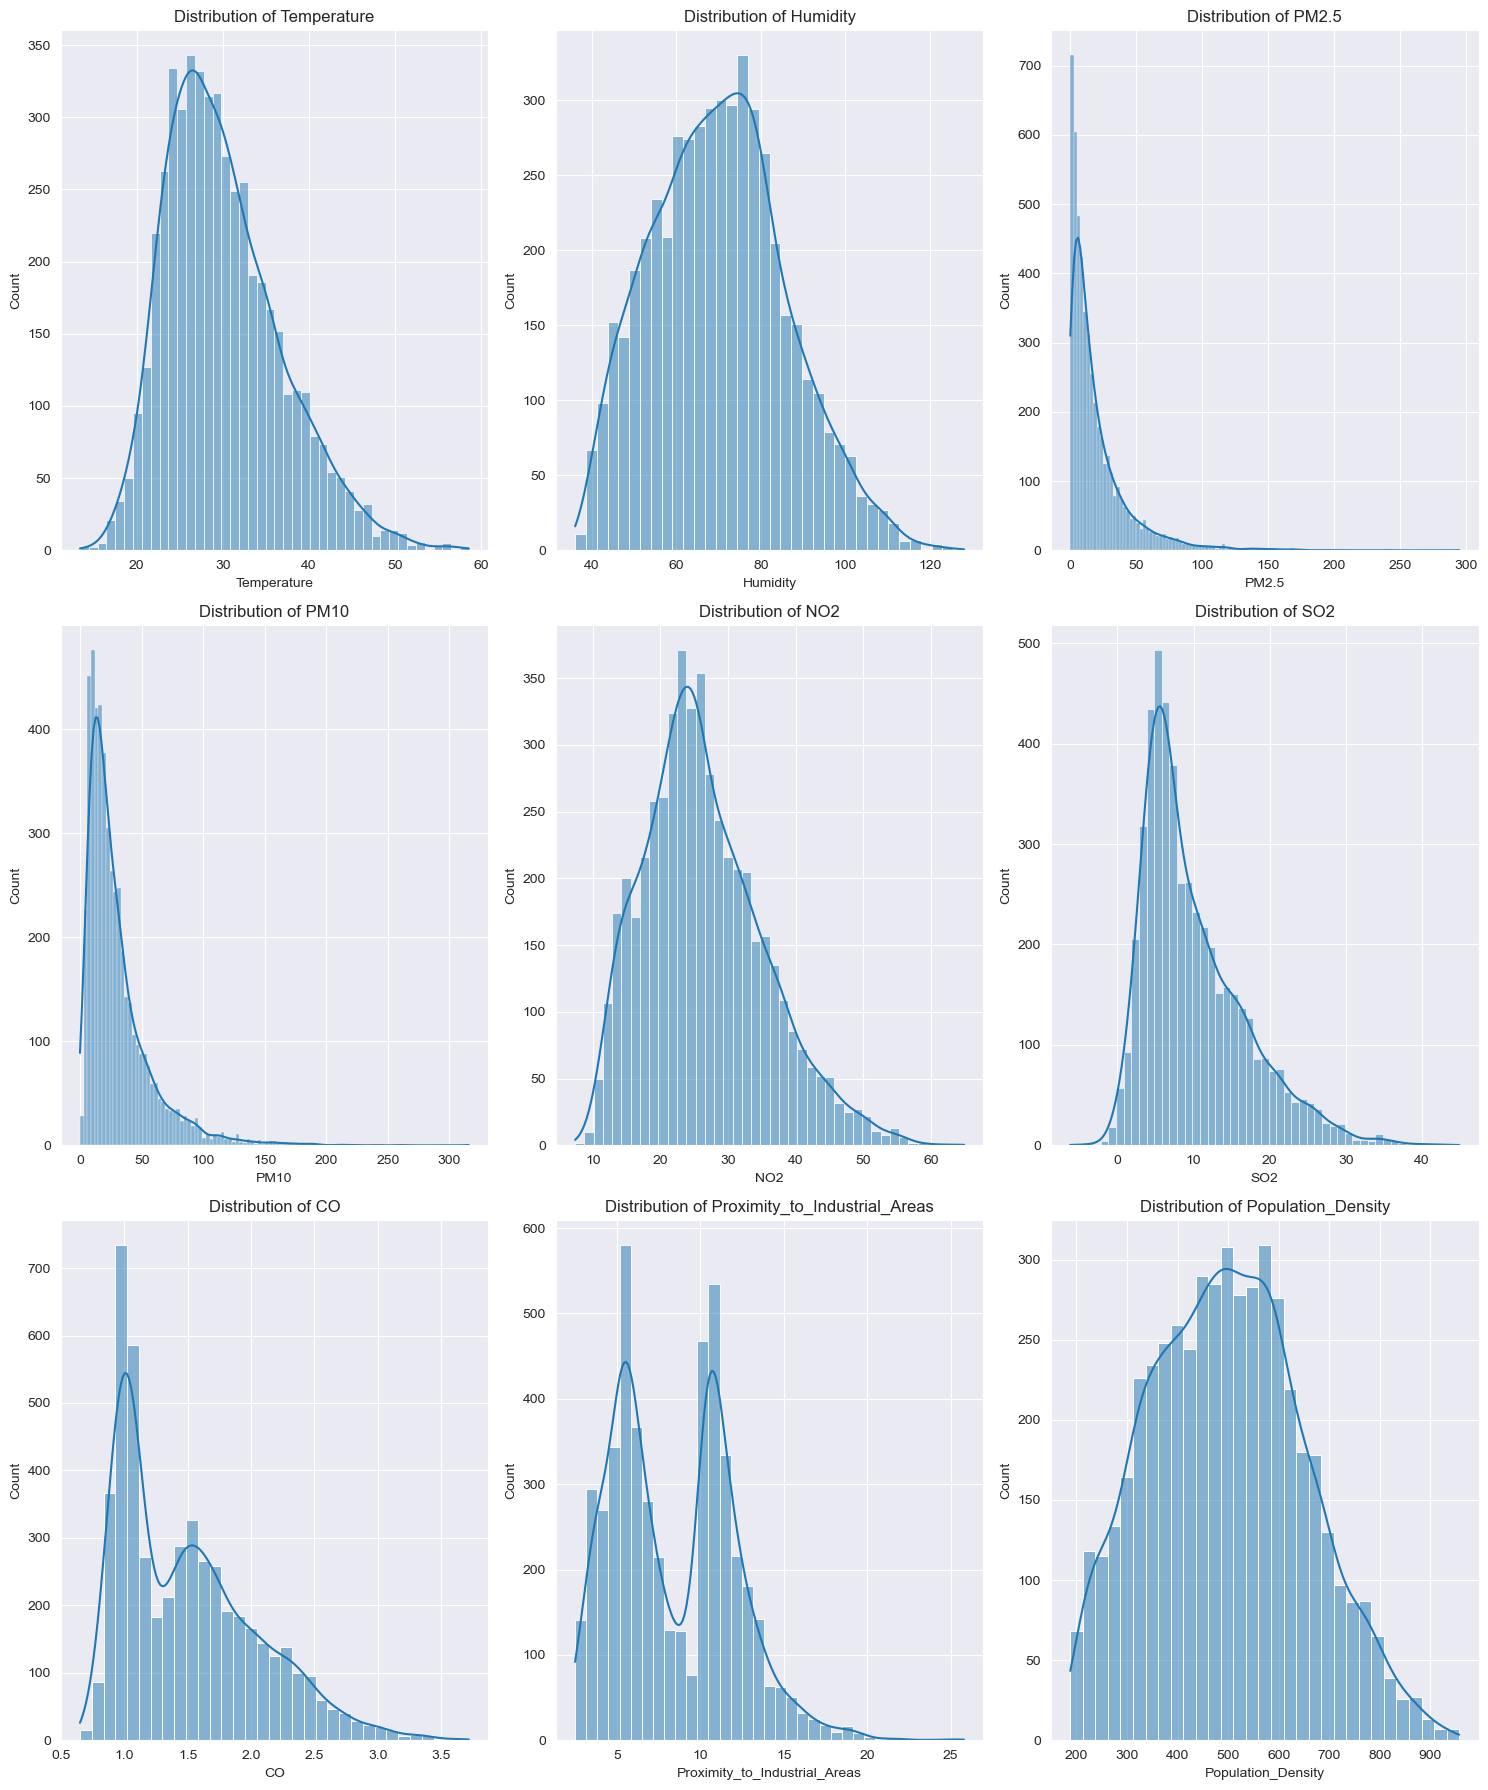

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numerical_columns)
num_rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)  # Round up if there's a remainder
num_cols = 3  # Fix number of columns to 3

# Create the subplots with dynamic grid size
plt.figure(figsize=(15, 6 * num_rows))  # Adjust the figure size based on rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

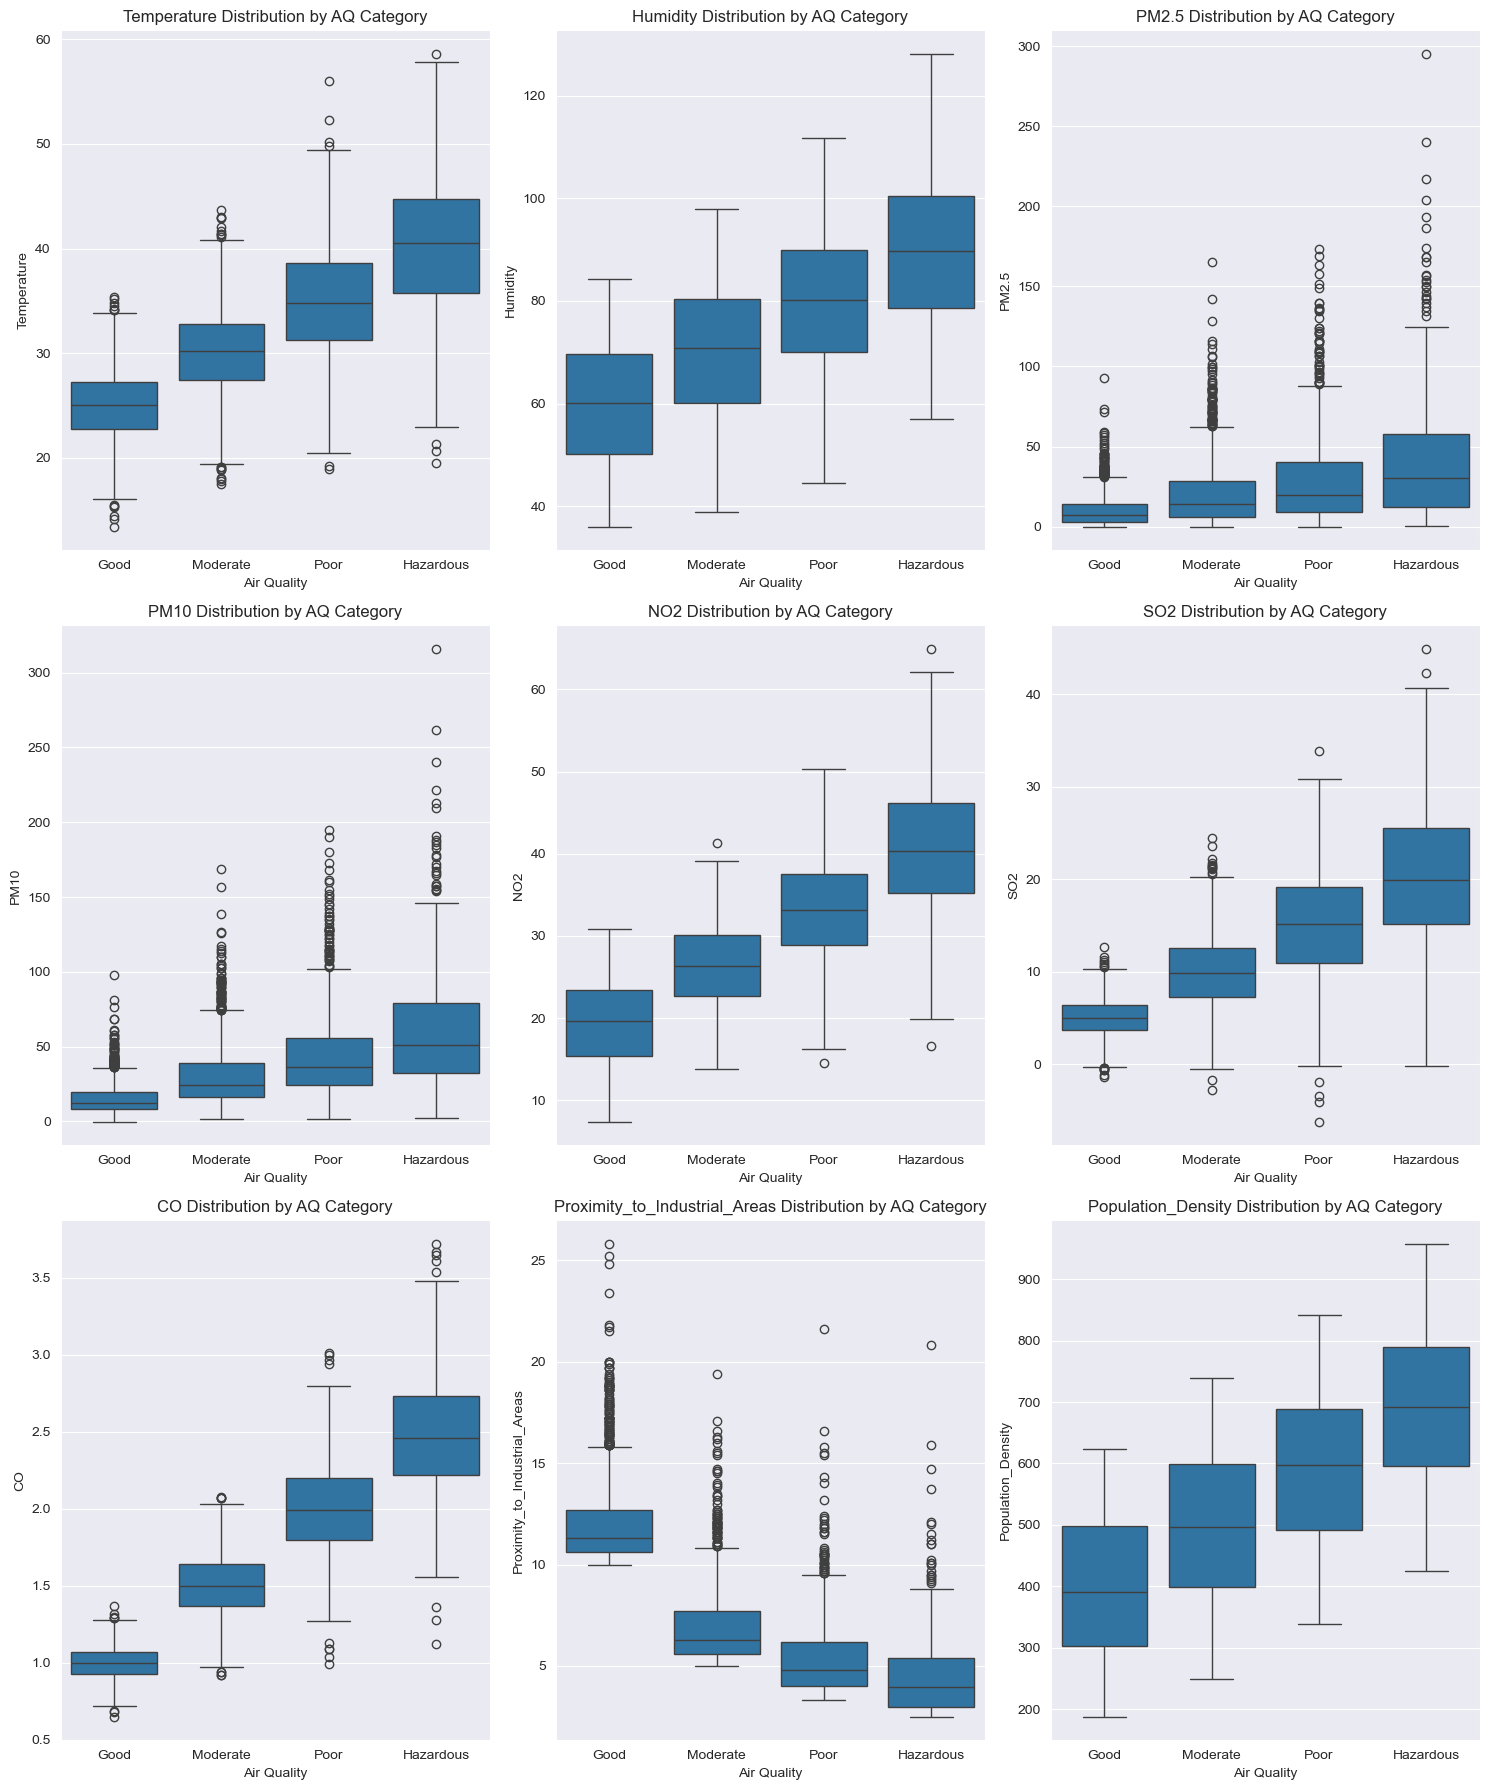

In [24]:
# Create box plots for each numerical feature grouped by AQI_Category
plt.figure(figsize=(15, 6 * num_rows))
order = ['Good', 'Moderate', 'Poor', 'Hazardous']
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df.columns[-1], y=df[column], data=df, order=order)
    plt.title(f'{column} Distribution by AQ Category')
plt.tight_layout()
plt.show()

In [25]:
# import numpy as np
#
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
#
# # 查看数据结构
# print("数据列名:")
# print(df.columns.tolist())
# print("\n空气质量分类:")
# print(df['Air Quality'].unique())
#
# # 将Air Quality分类变量转换为数值变量以便计算相关性
# # 使用标签编码
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Air_Quality_Numeric'] = le.fit_transform(df['Air Quality'])
#
# print("\n空气质量编码映射:")
# for i, quality in enumerate(le.classes_):
#     print(f"{quality}: {i}")
#
# # 计算相关性矩阵
# # 包含所有数值变量和编码后的空气质量
# correlation_columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
#                       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air_Quality_Numeric']
# correlation_data = df[correlation_columns]
# correlation_matrix = correlation_data.corr()
#
# # 绘制相关性热力图
# plt.figure(figsize=(12, 10))
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # 创建上三角遮罩
#
# sns.heatmap(correlation_matrix,
#             mask=mask,
#             annot=True,
#             cmap='coolwarm',
#             center=0,
#             square=True,
#             fmt='.2f',
#             cbar_kws={"shrink": .8})
#
# plt.title('空气质量与各因素相关性热力图', fontsize=16, pad=20)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()
#
# # 显示与空气质量相关性最强的前10个特征
# air_quality_corr = correlation_matrix['Air_Quality_Numeric'].abs().sort_values(ascending=False)
# print("\n与空气质量相关性排序（绝对值）:")
# for i, (feature, corr) in enumerate(air_quality_corr.items()):
#     if feature != 'Air_Quality_Numeric':  # 排除自身
#         feature_name = feature if feature != 'Air_Quality_Numeric' else 'Air Quality'
#         print(f"{i}. {feature}: {correlation_matrix.loc[feature, 'Air_Quality_Numeric']:.3f}")

# Train Model & Predict

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# train & predict & evaluate by sklearn DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print(report);

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      0.98      0.99       409
   Hazardous       0.73      0.84      0.78       111
    Moderate       0.92      0.93      0.92       294
        Poor       0.77      0.73      0.75       186

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000

              precision    recall  f1-score   support

        Good       1.00      0.98      0.99       409
   Hazardous       0.73      0.84      0.78       111
    Moderate       0.92      0.93      0.92       294
        Poor       0.77      0.73      0.75       186

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000



In [28]:
# Train DIY CART Model
from DecisionTree import DecisionTree

model = DecisionTree(max_depth=6,  task='classification')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       409
   Hazardous       0.82      0.77      0.80       111
    Moderate       0.95      0.90      0.93       294
        Poor       0.76      0.84      0.80       186

    accuracy                           0.92      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.92      0.92      0.92      1000



In [29]:
# Transform the problem to regression, and train DIY GBDT Model
y_train = y_train.map({'Good': 25, 'Moderate': 50, 'Poor': 75, 'Hazardous': 100})

from GBDT import GBDT
import numpy as np

model = GBDT(n_estimators=20, learning_rate=0.1, max_depth=5, min_samples_split=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print the predicted value distribution
print(np.max(y_pred))
print(np.min(y_pred))

# scale the predicted value to 0-100, map min to 1, max to 100
y_pred = (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred)) * 100

# change the predicted value to the original category
# 0-25: Good, 26-50: Moderate, 51-75: Poor, 76-100: Hazardous
y_pred = np.where(y_pred < 26, 'Good', np.where(y_pred < 51, 'Moderate', np.where(y_pred < 76, 'Poor', 'Hazardous')))

# Evaluate Model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Training iteration 1/20 - First 5 residuals: [100.  25.  75.  25.  25.], Residual mean: 50.0063, std: 24.8809
Training iteration 2/20 - First 5 residuals: [92.68811881 22.49683143 67.68811881 22.49683143 22.49683143], Residual mean: 45.0056, std: 22.5567
Training iteration 3/20 - First 5 residuals: [86.05098136 20.24397972 61.05098136 20.24397972 20.24397972], Residual mean: 40.5051, std: 20.4805
Training iteration 4/20 - First 5 residuals: [79.6196454  18.21641318 54.6196454  18.21641318 18.21641318], Residual mean: 36.4546, std: 18.6225
Training iteration 5/20 - First 5 residuals: [74.12459161 16.38974543 49.12459161 16.38974543 16.38974543], Residual mean: 32.8091, std: 16.9551
Training iteration 6/20 - First 5 residuals: [69.13609113 14.74672242 44.13609113 14.74672242 14.74672242], Residual mean: 29.5282, std: 15.4509
Training iteration 7/20 - First 5 residuals: [64.73216391 13.27108928 39.73216391 13.27108928 13.27108928], Residual mean: 26.5754, std: 14.1111
Training iteration 8